<div style="display: flex; text-align:center; background-color: RGB( 254, 249, 231 );border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em"><font color="#475AFF">Correlations entre le genre de client et categorie de produits achetés</font>
</h1>
</div>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv("./DATA/cleaned/in_data.csv")
data.head()

,date,client_id,birth,categ,sex,id_prod,price,session_id,age,month,day
0,2021-03-01 00:01:07.843138,c_329,1967.0,0,f,0_1259,11.99,s_1,55.0,2021-03,2021-03-01
1,2021-03-01 00:02:26.047414,c_664,1960.0,0,m,0_1390,19.37,s_2,62.0,2021-03,2021-03-01
2,2021-03-01 00:02:38.311413,c_580,1988.0,0,m,0_1352,4.50,s_3,34.0,2021-03,2021-03-01
3,2021-03-01 00:04:54.559692,c_7912,1989.0,0,f,0_1458,6.55,s_4,33.0,2021-03,2021-03-01
4,2021-03-01 00:05:18.801198,c_2033,1956.0,0,f,0_1358,16.49,s_5,66.0,2021-03,2021-03-01


In [3]:
#tableau de contigence entre sexe de client et categorie de produits achetés
X = "sex"
Y = "categ"

c = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()

tx = data[X].value_counts()
ty = data[Y].value_counts()

cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(data)
cont

categ,0,1,2,Total
sex,,,,
f,206220.0,114899.0,17283.0,338402.0
m,209460.0,112270.0,19200.0,340930.0
total,415680.0,227169.0,36483.0,679332.0


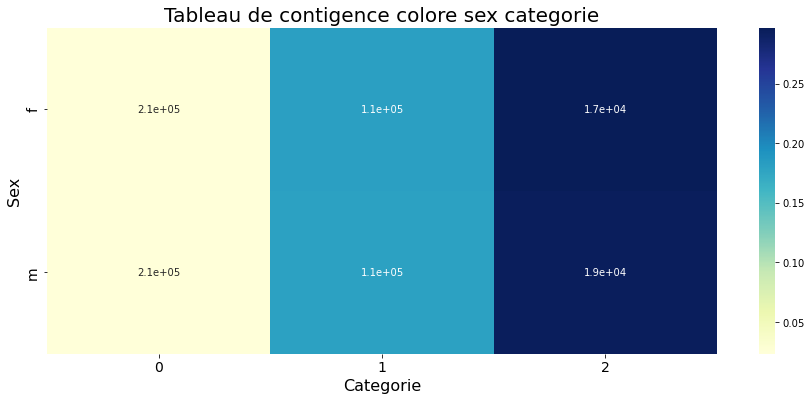

In [4]:
fig = plt.figure(figsize=(15,6))
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(data)
indep = tx.dot(ty.T) / n

c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n,annot=c,cmap="YlGnBu")
plt.title('Tableau de contigence colore sex categorie',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Categorie",fontsize=16)
plt.ylabel("Sex",fontsize=16)
plt.show()
fig.savefig('./GRAPHIQUES/Correlation_genre_produitsAchetes/Tableau_de_contigence_colore_sex_categorie.png',dpi=fig.dpi*10)
plt.close(fig)

In [5]:
print('xi_n:',xi_n)

xi_n: 147.00253568681114


### Chi-Squared Test
Testons l'independance entre la variable sex et la variable categorie qui sont deux variables qualitatives

Soit les hypothèses
H0: les deux variables sont independantes.
H1: les deux variables sont dependantes.

In [6]:
#  the Chi-Squared Test
from scipy.stats import chi2_contingency
table = c
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Nous ne rejetons pas HO ; les variables sont probablement independantes')
else:
    print('Nous rejetons HO ; les variables sont probablement dependantes')

stat=147.003, p=0.000
Nous rejetons HO ; les variables sont probablement dependantes


nous pouvons conclure avec un niveau de risque de 5% que Le Genre (sexe) du client et la catégorie des livres acheté sont dependantes .

### MERCI DE VOTRE ATTENTION